In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading the dataset from Excel file
data = pd.read_excel('latest_condo_final_ml.xlsx')  

In [2]:
# data.info()

In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85016 entries, 0 to 85016
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   originalprice_plp               85016 non-null  int64         
 1   originalprice_plp_derived       85016 non-null  int64         
 2   list_price                      85016 non-null  int64         
 3   sold_price                      85016 non-null  int64         
 4   daysonmarket                    85016 non-null  int64         
 5   sold_year                       85016 non-null  int64         
 6   address_city                    85016 non-null  object        
 7   address_streetsuffix            85016 non-null  object        
 8   latitude                        85016 non-null  float64       
 9   longitude                       85016 non-null  float64       
 10  taxes_annualamount              85016 non-null  float64       
 11  ta

In [5]:
# data.hist(figsize=(15,15))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
# plt.show()

In [8]:
# Filter columns with object data type
object_columns = data.select_dtypes(include=['object'])

# Display information for object columns only
object_columns.info()

# Display unique count for each object column
for column in object_columns.columns:
    unique_count = data[column].nunique()
    print("Count of unique values in '{}' column: {}".format(column, unique_count))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85016 entries, 0 to 85016
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   address_city                    85016 non-null  object
 1   address_streetsuffix            85016 non-null  object
 2   details_den                     85016 non-null  object
 3   details_sqft                    85016 non-null  object
 4   details_style                   85016 non-null  object
 5   details_garage                  85016 non-null  object
 6   details_heating                 85016 non-null  object
 7   details_propertytype            85016 non-null  object
 8   details_airconditioning         85016 non-null  object
 9   details_exteriorconstruction1   85016 non-null  object
 10  details_centralairconditioning  85016 non-null  object
 11  details_commonelementsincluded  85016 non-null  object
 12  condominium_fees_heatincl       85016 non-null

In [9]:
# Filter columns with object data type
object_columns = data.select_dtypes(include=['object'])

# Iterate over object columns
for column in object_columns.columns:
    unique_count = data[column].nunique()
    if unique_count <= 6:
        #print("Count of unique values in '{}' column: {}".format(column, unique_count))
        
        # Apply one-hot encoding to the column
        encoded_column = pd.get_dummies(data[column], prefix=column)
        
        # Concatenate the original DataFrame with the encoded column
        data = pd.concat([data.drop(column, axis=1), encoded_column], axis=1)

In [10]:
# Apply one-hot encoding to the 'details_sqfeet' column
encoded_column = pd.get_dummies(data['condominium_parkingtype'], prefix='condominium_parkingtype')

# Concatenate the original DataFrame with the encoded column
data = pd.concat([data.drop('condominium_parkingtype', axis=1), encoded_column], axis=1)


In [11]:
# data.info()

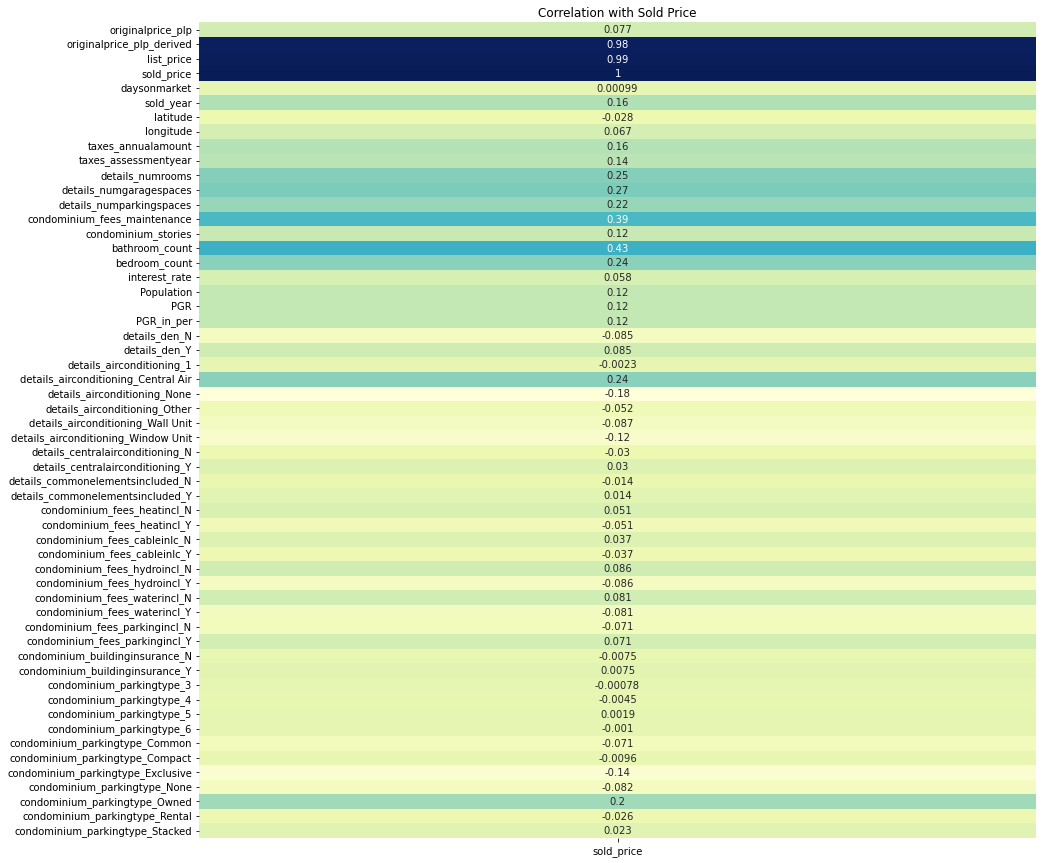

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the correlation matrix to include only 'sold price' column
sold_price_corr = data.corr()['sold_price']

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(sold_price_corr.to_frame(), annot=True, cmap='YlGnBu', cbar=False)
plt.title('Correlation with Sold Price')
plt.show()

In [13]:
# # Sort correlation values by their absolute values
# sorted_corr = sold_price_corr.abs().sort_values(ascending=False)

# # Plot heatmap
# plt.figure(figsize=(15, 15))
# sns.heatmap(sold_price_corr[sorted_corr.index].to_frame(), annot=True, cmap='YlGnBu', cbar=False)
# plt.title('Correlation with Sold Price')
# plt.show()


In [14]:
# Filter columns with object data type
object_columns = data.select_dtypes(include=['object'])

# Display information for object columns only
object_columns.info()

# Display unique count for each object column
for column in object_columns.columns:
    unique_count = data[column].nunique()
    print("Count of unique values in '{}' column: {}".format(column, unique_count))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85016 entries, 0 to 85016
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   address_city                   85016 non-null  object
 1   address_streetsuffix           85016 non-null  object
 2   details_sqft                   85016 non-null  object
 3   details_style                  85016 non-null  object
 4   details_garage                 85016 non-null  object
 5   details_heating                85016 non-null  object
 6   details_propertytype           85016 non-null  object
 7   details_exteriorconstruction1  85016 non-null  object
dtypes: object(8)
memory usage: 5.8+ MB
Count of unique values in 'address_city' column: 139
Count of unique values in 'address_streetsuffix' column: 49
Count of unique values in 'details_sqft' column: 34
Count of unique values in 'details_style' column: 13
Count of unique values in 'details_garage' c

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into features (X) and target variable (y)
X = data.drop(['sold_price', 'address_city','address_streetsuffix',
               'details_sqft','details_style','sold_date','details_garage',
               'details_heating','details_propertytype','details_exteriorconstruction1','latitude','longitude'], axis=1)
y = data['sold_price']

# # Fill missing values with the mean of each column
# X_train.fillna(X_train.mean(), inplace=True)
# X_test.fillna(X_test.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 29668.390586162644
Test RMSE: 29656.94603156219


These values indicate that, on average, the model's predictions are off by approximately \\$29,668 for the training data and \\$29,657 for the testing data in terms of sold_price. Lower RMSE values indicate better model performance, so these values suggest that the model's predictions are relatively accurate, considering the range and distribution of sold_price in the dataset.


In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R-squared for testing set
test_r2 = r2_score(y_test, test_predictions)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.9793825037099059
Test R-squared: 0.9796357781021925


Train R-squared: 0.9794
Test R-squared: 0.9796
These high values indicate that the model predicts sold_price accurately, with about 97.94% and 97.96% 
of the variance explained for the training and testing data, respectively.